In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

5. How many rows and columns are in `gdp_df`? What are the data types of each column?
*7662 Rows: Country:Object , Year:Int64, Value:Float, Value Footnotes:Float*

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df=gdp_df.drop(columns = 'Value Footnotes')


In [9]:
gdp_df=gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?
*There are 40 countries that do not have all the data.*

In [11]:
gdp_df['Year'].nunique()

33

In [12]:
country_counts = gdp_df.Country.value_counts().to_frame().reset_index()
country_counts

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [13]:
country_counts = country_counts.rename(columns = {'index' : 'Country', 'Value': 'GDP_Per_Capita'})

In [14]:
len(country_counts)

242

In [15]:
len(country_counts.loc[country_counts['count'] == 33])

202

In [16]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [17]:
country_counts.loc[country_counts['count'] < 33]

,Country,count
202,Hungary,32
203,Lebanon,32
204,Aruba,32
205,Tonga,32
206,Bhutan,32
207,Slovak Republic,31
208,Kuwait,31
209,Turkmenistan,31
210,Cambodia,30
211,West Bank and Gaza,29


8. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
*Less than 10K has greatest GDP Per Capita*

In [19]:
count_year = gdp_df.Year.value_counts().to_frame().reset_index()
count_year

,Year,count
0,2013,242
1,2016,242
2,2014,242
3,2015,242
4,2020,242
5,2017,242
6,2018,242
7,2019,242
8,2021,241
9,2012,240


In [20]:
count_year.columns = ['Year', 'Count']

<Axes: xlabel='Year'>

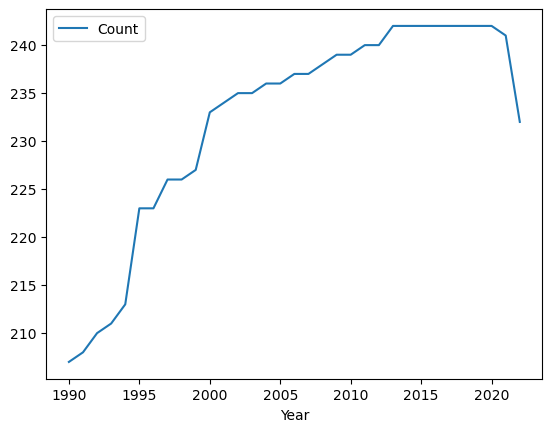

In [21]:
count_year.sort_values('Year').plot(x = 'Year')

In [22]:
gdp_2020= gdp_df.loc[gdp_df.Year == 2020]

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

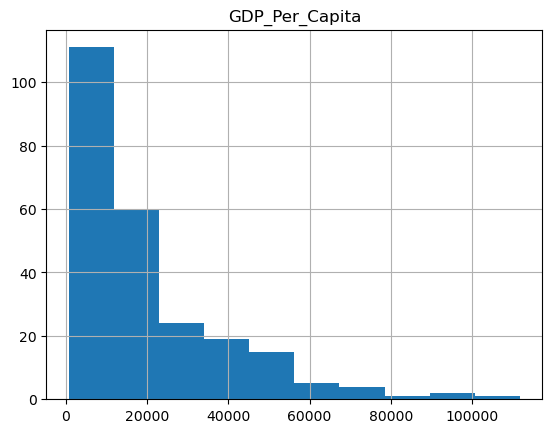

In [23]:
gdp_2020.hist('GDP_Per_Capita')

<Axes: ylabel='GDP_Per_Capita'>

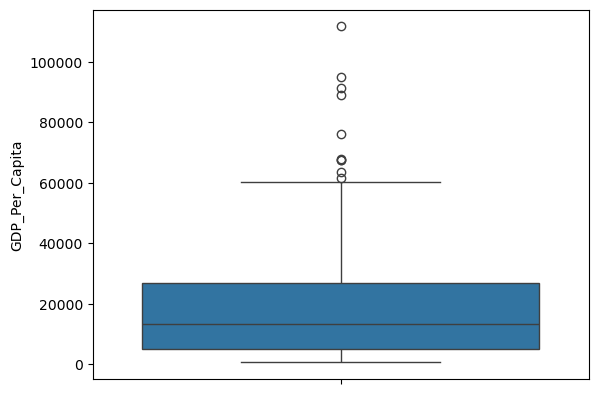

In [24]:
sns.boxplot(gdp_df.GDP_Per_Capita.loc [gdp_df.Year == 2020])

<Axes: ylabel='GDP_Per_Capita'>

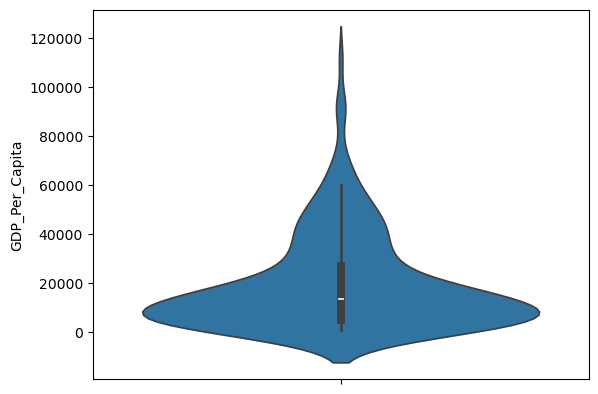

In [25]:
sns.violinplot(y=gdp_df.GDP_Per_Capita.loc [gdp_df.Year == 2020])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

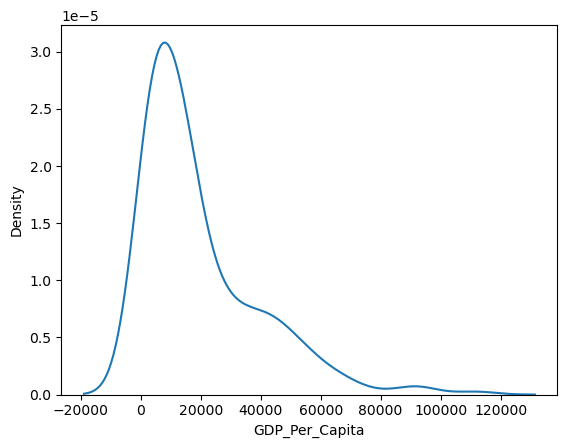

In [26]:
sns.kdeplot(gdp_df.GDP_Per_Capita.loc [gdp_df.Year == 2020])

9. What was the median GDP per capita value in 2020?
*13,358*

In [28]:
round(gdp_2020.GDP_Per_Capita.median(), 2)

13358.0

10. Compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barpln)
	* A scatterplot
	* A scatterplot with a trend line over
 
  rn)  **GDP has been growing but most countries are at or below 20,00**


In [30]:
gdp_decades = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

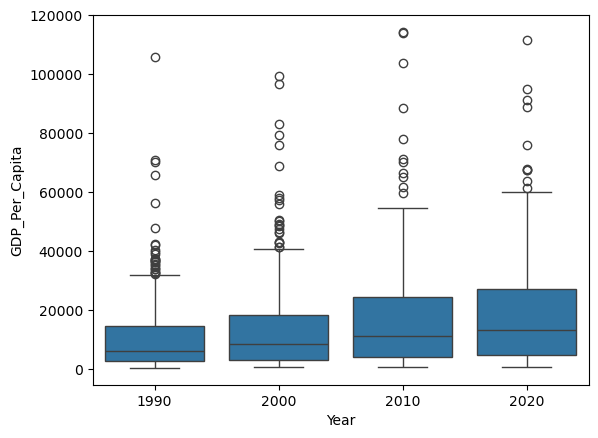

In [31]:
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

- countries are going up over time but at different times. Richer countries are moving quicker than poorer countries.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

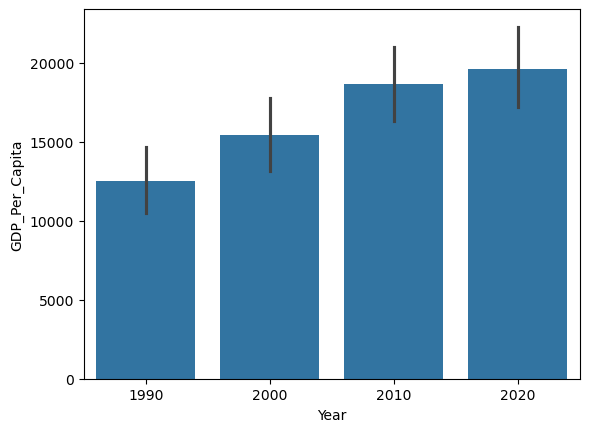

In [33]:
sns.barplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

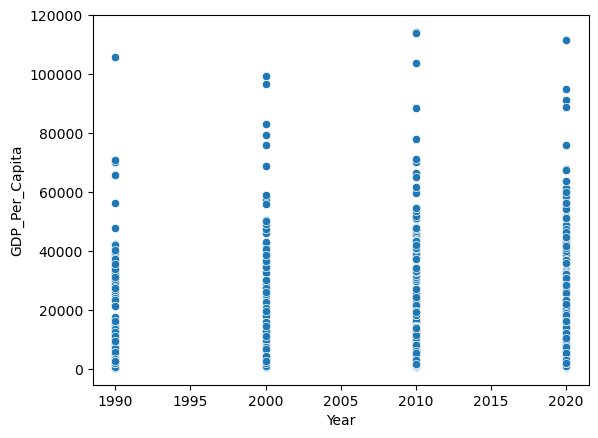

In [34]:
sns.scatterplot(data=gdp_decades, x="Year", y="GDP_Per_Capita")

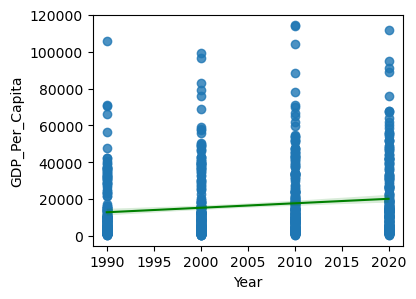

In [35]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "green", "linewidth": 1.5},
    ax=ax)
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [86]:
gdp_df.loc[gdp_df['GDP_Per_Capita'] > 100000].sort_values('Year').head(1)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [88]:
highest_gdp = gdp_df.loc[gdp_df['Year'] == 2020]
highest_gdp.loc[highest_gdp['GDP_Per_Capita'] == highest_gdp['GDP_Per_Capita'].max()]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [78]:
lux_gdp = gdp_df.loc[gdp_df['Country'] == 'Luxembourg']

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

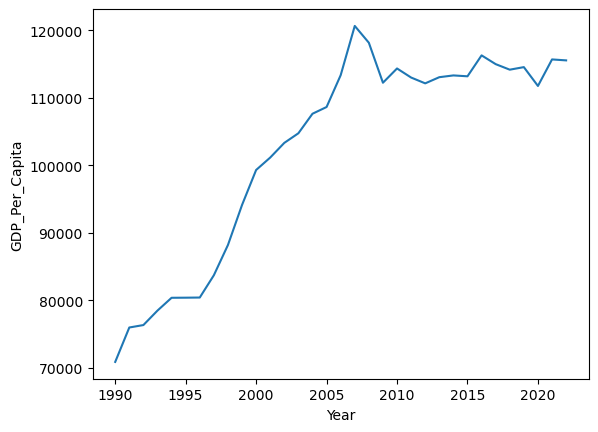

In [80]:
sns.lineplot(y=lux_gdp['GDP_Per_Capita'], x=lux_gdp['Year'])

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [90]:
lowest_gdp = gdp_df.loc[gdp_df['Year'] == 2020]
lowest_gdp.loc[lowest_gdp['GDP_Per_Capita'] == lowest_gdp['GDP_Per_Capita'].min()]

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [92]:
burundi_gdp = gdp_df.loc[gdp_df['Country'] == 'Burundi']

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

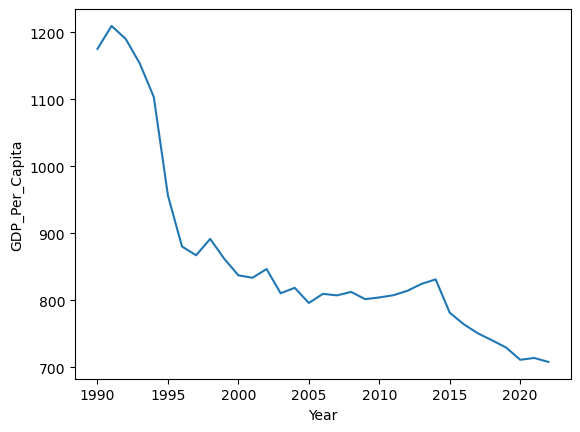

In [94]:
sns.lineplot(y=burundi_gdp ['GDP_Per_Capita'], x=burundi_gdp ['Year'])

13. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?
*It is TRUE that there is a higher GDP in 2020 than 1990; only 19 countries were higher in 1990 than 2020.*

In [98]:
gdp_1990 = gdp_df.loc[gdp_df.Year == 1990]
gdp_1990

,Country,Year,GDP_Per_Capita
52,Africa Eastern and Southern,1990,3037.297466
85,Africa Western and Central,1990,2788.301039
118,Albania,1990,4827.027705
151,Algeria,1990,8828.874473
184,Angola,1990,5793.084512
...,...,...,...
7500,Vanuatu,1990,2774.138350
7533,Viet Nam,1990,2099.394649
7595,World,1990,9705.981267
7628,Zambia,1990,2290.039226


In [100]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [102]:
gdp_1990_and_2020 = pd.merge(gdp_1990, gdp_2020, on = 'Country', how = 'inner')
gdp_1990_and_2020

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
0,Africa Eastern and Southern,1990,3037.297466,2020,3455.023119
1,Africa Western and Central,1990,2788.301039,2020,3957.933804
2,Albania,1990,4827.027705,2020,13278.369769
3,Algeria,1990,8828.874473,2020,10844.770764
4,Angola,1990,5793.084512,2020,6029.691895
...,...,...,...,...,...
202,Vanuatu,1990,2774.138350,2020,2848.970240
203,Viet Nam,1990,2099.394649,2020,10450.622382
204,World,1990,9705.981267,2020,16204.169107
205,Zambia,1990,2290.039226,2020,3183.650773


In [130]:
pd.Series(gdp_1990_and_2020.GDP_Per_Capita_x > gdp_1990_and_2020.GDP_Per_Capita_y).sum()

19

In [148]:
gdp_1990_and_2020.loc[gdp_1990_and_2020.GDP_Per_Capita_x > gdp_1990_and_2020.GDP_Per_Capita_y]

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
15,Barbados,1990,14097.395550,2020,13805.777541
25,Brunei,1990,70358.724094,2020,61603.550804
28,Burundi,1990,1175.155086,2020,711.355263
34,Central African Republic,1990,1200.613390,2020,847.765012
41,Congo,1990,5007.319245,2020,3384.654335
45,Dem. Rep. Congo,1990,1750.169739,2020,1044.071214
66,Fragile and conflict affected situations,1990,4864.814075,2020,4357.621312
68,Gabon,1990,17559.006114,2020,13903.288955
76,Guinea-Bissau,1990,1998.173206,2020,1803.630591
78,Haiti,1990,3612.815105,2020,2970.462845


14. Read in the internet use dataset into a DataFrame named `internet_df`. 

In [132]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [172]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [174]:
internet_df.tail()

,Country,Year,Internet_Users_Pct
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739
6082,Zimbabwe,1990,0.000000


In [134]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [138]:
internet_df = internet_df.drop(columns = 'Value Footnotes')
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [140]:
internet_df=internet_df.rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?
*1990 was the first year, sharp increase until 2000 stayed steady until 2017 then began to drop.*

In [142]:
internet_counts = internet_df.value_counts('Year').to_frame().reset_index()
internet_counts

,Year,count
0,1990,226
1,2007,217
2,2008,214
3,2011,214
4,2009,214
5,2002,214
6,2001,212
7,2005,212
8,2006,212
9,2004,210


In [144]:
internet_counts.columns = ['Year', 'Count']

<Axes: xlabel='Year'>

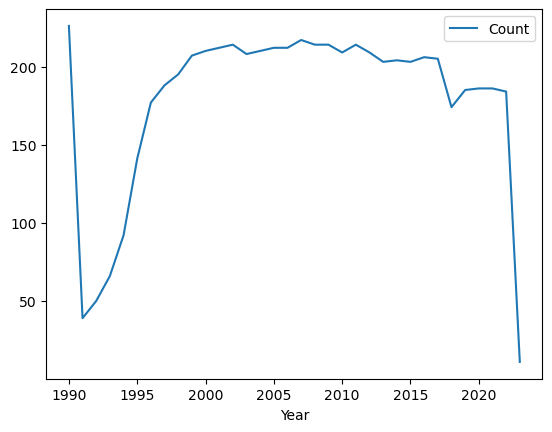

In [146]:
internet_counts.sort_values('Year').plot(x = "Year", y = "Count")

17. What is the first year to have a non-zero internet users percentage value?

In [150]:
internet_df.loc[internet_df.Internet_Users_Pct > 0].Year.min()

1990

18. How does the distribution of internet users percent differ for 2000 and 2014?
*There are substantially more users in 2014 than 2000*

In [152]:
internet_2000_and_2014 = internet_df.loc[internet_df.Year.isin([2000,2014,])]
internet_2000_and_2014

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


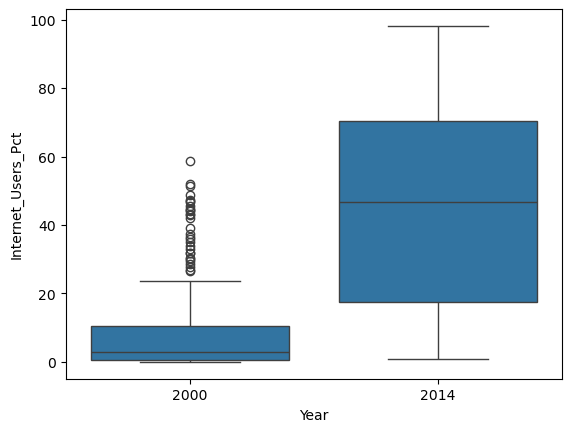

In [154]:
sns.boxplot(x= 'Year', y = 'Internet_Users_Pct', data = internet_2000_and_2014);

In [156]:
differ_2020_df = internet_df.loc[(internet_df['Year'] == 2020)]
differ_2020_df

,Country,Year,Internet_Users_Pct
22,Albania,2020,72.2377
51,Algeria,2020,60.6534
82,Andorra,2020,93.2056
108,Angola,2020,36.6347
155,Antigua and Barbuda,2020,86.8837
...,...,...,...
5900,Vatican,2020,77.9500
5931,Viet Nam,2020,70.3000
5999,Yemen,2020,13.8152
6025,Zambia,2020,24.4992


In [158]:
differ_2014_df = internet_df.loc[(internet_df['Year'] == 2014)]
differ_2014_df

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623
...,...,...,...
5937,Viet Nam,2014,41.0000
5960,Virgin Islands (US),2014,50.0700
6003,Yemen,2014,22.5500
6031,Zambia,2014,6.5000


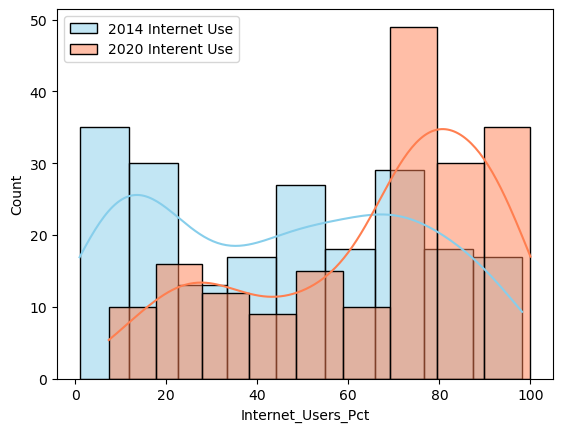

In [160]:
sns.histplot(data=differ_2014_df, x="Internet_Users_Pct", color="skyblue", label="2014 Internet Use", kde=True)
sns.histplot(data=differ_2020_df, x="Internet_Users_Pct", color="coral", label="2020 Interent Use", kde=True)

plt.legend() 
plt.show()

19. For how many countries was the percentage of internet users below 5% in 2014?
*10 Countries*

In [162]:
internet_df.loc[(internet_df.Year == 2014) & (internet_df.Internet_Users_Pct < 5)]

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [164]:
len(internet_df.loc[(internet_df.Year == 2014) & (internet_df.Internet_Users_Pct < 5)])

10

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [178]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Country', 'Year'], how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
9107,Zimbabwe,2018,2399.621551,25.000000
9108,Zimbabwe,2019,2203.396810,26.588300
9109,Zimbabwe,2020,1990.319419,29.298600
9110,Zimbabwe,2021,2115.144555,32.461600


21.Find the three countries with the highest internet users percentage in 2014. What do you notice?

In [208]:
gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014].nlargest(3, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3820,Iceland,2014,50450.741612,98.158
2780,Falkland (Malvinas) Islands,2014,NaN,97.600
794,Bermuda,2014,77361.104881,96.800


In [218]:
countries = ['Iceland','Falkland (Malvinas) Islands','Bermuda']

In [222]:
top_3=gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(countries)]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
770,Bermuda,1990,65961.406278,0.0000
771,Bermuda,1991,63958.896254,NaN
772,Bermuda,1992,64385.407410,NaN
773,Bermuda,1993,65967.850014,NaN
774,Bermuda,1994,65904.720421,NaN
...,...,...,...,...
3824,Iceland,2018,56816.566601,99.0110
3825,Iceland,2019,56584.168683,99.5049
3826,Iceland,2020,51641.392081,99.5328
3827,Iceland,2021,53003.170408,99.6870


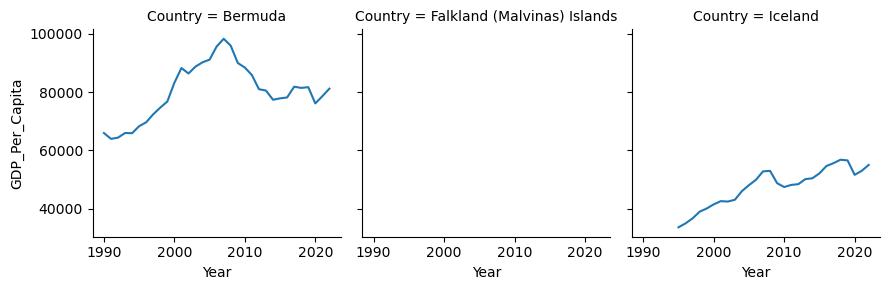

In [224]:
g = sns.FacetGrid(top3, col="Country")
g.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [226]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2014,2144.449634,7.0000
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3000
145,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN
9011,World,2014,15120.730322,NaN
9039,Yemen,2014,NaN,22.5500
9070,Zambia,2014,3375.941270,6.5000


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.
*There is a positive correlation between GDP Per Capita and Internet Users Percentage.*

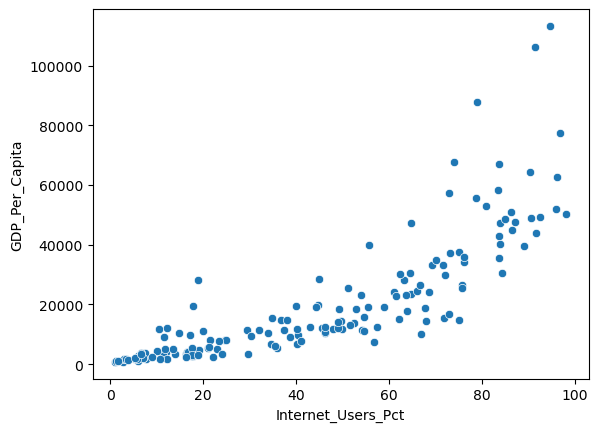

In [228]:
sns.scatterplot(x="Internet_Users_Pct", y="GDP_Per_Capita", data=gdp_and_internet_use_2014)
plt.show()

24. **Stretch Question:**  Use the `qcut` function to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [232]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita, q = 3, labels = ['Low', 'Medium', 'High'])
gdp_and_internet_use_2014

C:\Users\Jenna\AppData\Local\Temp\ipykernel_89668\1991753686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita, q = 3, labels = ['Low', 'Medium', 'High'])


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
14,Afghanistan,2014,2144.449634,7.0000,Low
46,Africa Eastern and Southern,2014,3642.875373,NaN,Low
79,Africa Western and Central,2014,4146.994622,NaN,Low
112,Albania,2014,11586.817446,54.3000,Medium
145,Algeria,2014,11561.259795,29.5000,Medium
...,...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN,Low
9011,World,2014,15120.730322,NaN,Medium
9039,Yemen,2014,NaN,22.5500,NaN
9070,Zambia,2014,3375.941270,6.5000,Low


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [234]:
gdp_and_internet_use_2014['Internet_Users_Pct'].median()

46.818

In [240]:
median_internet_users = gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()
median_internet_users

C:\Users\Jenna\AppData\Local\Temp\ipykernel_89668\2577651128.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_internet_users = gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       11.0000
Medium    45.8752
High      75.9800
Name: Internet_Users_Pct, dtype: float64